### IMPORTS
    These section get the modules tha we weill use in this work

In [9]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from numpy import arange
import operator
import json

#### Funcion sections

    - Defined functions used to obtain information / visualization from description of the crimes. This section is important because we could not use an existing / complete api to do this specific task. With that, we had to develop some scripts to achieve our goals with types of crimes.
    - A simple describe is above all functions.

In [16]:
#FUNCTIONS - Calcs

# This function gets all the words and checks the times in which they occur in pairs with all other words. 
# This work is based on the descriptions of the crimes and the words previously extracted from these crimes.
# ---------
# motgomery_crime.csv
#
# return

# {...
#   'cds implemnt': {'cds': 48, 'cocaine& derivati': 28, 'opium&derivative': 20 },
#   'cds implment': {'cds': 2, 'halluc/lsd/pcp/et': 2 },
#   'cds implmnt':  {'barbitur/amphetami': 1,
#                    'cds': 303,
#                    'marijuana/hashish': 297,
#                    'overdose/not fatal': 3,
#                    'synth demerol/meth': 2 },
#   'cds rx': {'cds': 28,
#                    'cds rx forg opium & derivative': 20,
#                    'cds rx forgery barbiturates/amphet': 4,
#                    'cds rx forgery inhalant/glue/aeros': 1,
#                    'forgery synth demerol/metha': 3,
#                    'synth demerol/meth': 3 },
# ...}

def make_word_map(crime_types, words):
    dic = {}
    for word in words:
        dic[word] = {}
    for word in words:
        for ct in crime_types:
            if word in ct:
                for w in words:
                    if ((w in ct) and  (w != word)):
                        if w not in dic[word]:
                            dic[word][w] = 1
                        else:
                            dic[word][w] += 1
    #clean empty itens
    for w in words:
        if dic[w] == {}:
            del dic[w]
    return dic

#return dictionary of crime types and its counts - the type is equals to writed in original data
#the dictionary returned from function is sorted by values of each crime type
#dictionary key(type), value(value of it type)
# --------
# larceny
# Larceny

#return {'larceny': 2}

def count_crimes(data):
    dic = {}
    for crime in data:
        if crime not in dic:
            dic[crime] = 1
        else:
            dic[crime] += 1
    sorted_dic = {}
    sorted_dic = sorted(dic.items(), key=operator.itemgetter(1), reverse = True)
    return sorted_dic

#Function that receive crime types already splited by '-'. With it, the function return an array with each word/expression used 
#to describe crimes
# --------
# [['larceny', '200$'],[' child', 'abuse ']]

#return ['larceny','child','200$','abuse']

def take_words_from_types(data):
    new_data = []
    for j in data:
        for i in j:
            new_data.append(i.strip())
    return set(new_data)

# Enter a word and get the crime expressions like/equals to it, that contains some relation and its counts
# This functions are very helpfull to get the main idea about a word-domain specific from crime types
#The main idea is represented by a type:count map with a dictionary
# --------
# 'child'

# return{
#       "abuse/child": 
#           { "family offense": 88 },
#       "neglect/child": 
#           { "family offense": 44 },  
#       "child under 12 taken by parent": 
#           { "family offense": 3  }
#       }

def map_of_crime(word, word_map):
    new_data = {}
    for key, value in word_map.items():
        if word in key:
            new_data[key] = value
    return new_data

In [27]:
#FUNCTIONS - CHARTS

#This function get dates and plot some charts with summarized and progressive time information.
#the summary is defined by hour, day (week), day(month) day(year), month and year in wich crime occurred.

def line_chart_time (dates):
    
    to_make = []
    #getting hours count
    hours = dates.dt.hour.value_counts().sort_index()
    #Getting days on week, month and year count
    days_of_week = dates.dt.dayofweek.value_counts().sort_index()
    dates_of_month = dates.dt.day.value_counts().sort_index()
    days_of_year = dates.dt.dayofyear.value_counts().sort_index()
    #Getting month count
    months = dates.dt.month.value_counts().sort_index()
    #Getting year count
    years = dates.dt.year.value_counts().sort_index()
    
    to_make.append(hours)
    to_make.append(days_of_week)
    to_make.append(dates_of_month)
    to_make.append(days_of_year)
    to_make.append(months)
    to_make.append(years)
    
    fig, axs = plt.subplots(6,1)
    fig.set_size_inches(14,14)
    fig.subplots_adjust(hspace=0.8)
    
    to_make[0].plot(kind='line',rot=90 ,ax=axs[0], title='Hours  - Totals')
    to_make[1].plot(kind='line',rot=90 ,ax=axs[1], title='Days of week  - Totals - 0 is Sunday')
    to_make[2].plot(kind='line',rot=90 ,ax=axs[2], title='Dates of Month  - Totals')
    to_make[3].plot(kind='line',rot=90 ,ax=axs[3], title='Days of year  - Totals')
    to_make[4].plot(kind='line',rot=90 ,ax=axs[4], title='Months  - Totals')
    to_make[5].plot(kind='bar',rot=90 ,ax=axs[5], title='Years  - Totals')
    
    plt.plot()
    plt.show()
    

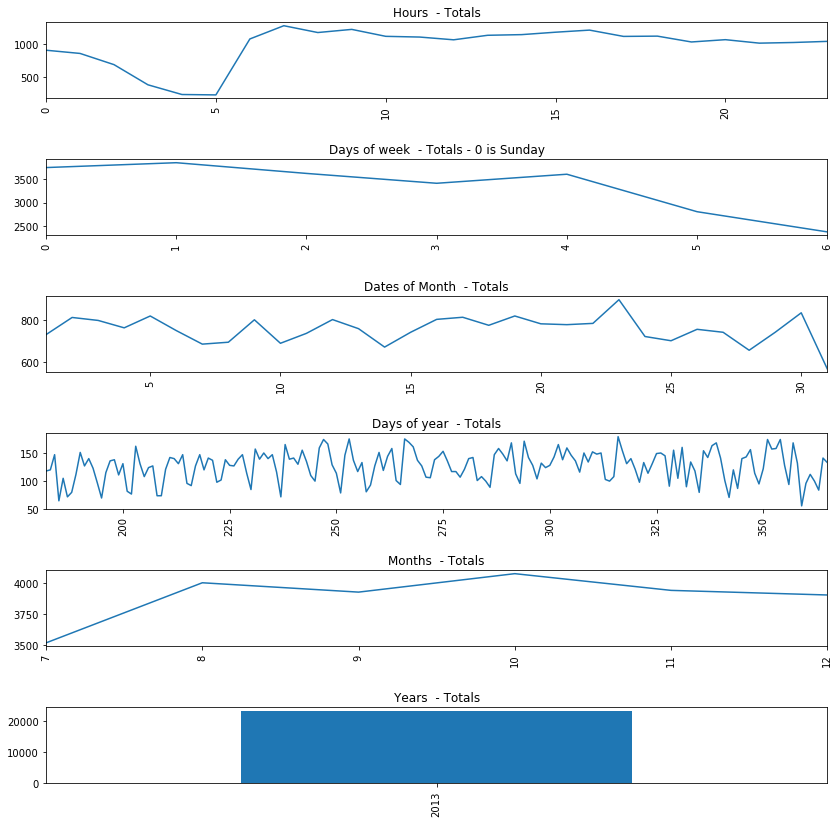

In [29]:
#get data from csv
crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")

#Getting Timestamp of dispatch
dates = pd.to_datetime(crimes["Dispatch Date / Time"])

#plot time charts
line_chart_time(dates)

In [13]:
#clean spaces from crime classes
crimes["Class Description"] = crimes["Class Description"].map(lambda x: x.strip())

#set all to lower case
crimes["Class Description"] = crimes["Class Description"].str.lower()

#take crime types
types = crimes["Class Description"]
#count crime types
crime_counted = count_crimes(types)

#take the words/expressions used to describe crimes
words_base = crimes["Class Description"].str.split('-')
words = take_words_from_types(words_base)

#Build a mapping of words(in types) inter relationed
word_map = make_word_map(types, words)
word_map

{'$199': {'larceny auto part $50': 40,
  'larceny bicycle $50': 54,
  'larceny coin mach $50': 1,
  'larceny from auto $50': 356,
  'larceny from building $50': 221,
  'larceny other $50': 202,
  'larceny pick pocket $50': 15,
  'larceny purse snatch $50': 5,
  'larceny shoplifting $50': 489,
  'other': 202,
  'po': 15},
 '$300+': {'$300+ other': 10,
  'bad checks': 34,
  'cash/other $300+': 20,
  'checks': 34,
  'embezzle confidence games': 81,
  'embezzle/theft': 10,
  'labor/service $300+': 4,
  'merchandise/ $300+': 10,
  'other': 30},
 '$300+ other': {'$300+': 10, 'embezzle/theft': 10, 'other': 10},
 '4th degree sex offense': {'sex offense': 38},
 'abuse/child': {'family offense': 88},
 'agg  asslt beat/inj spouse/partner': {'po': 15},
 'agg  asslt cut/stab othr domestc': {'cut/stab': 11},
 'agg  asslt cut/stab p.o.': {'cut/stab': 1},
 'agg  asslt firearm othr domestic': {'firearm': 2},
 'agg animal/bite': {'animal offense': 3},
 'agg asslt beat/inj elderly': {'elderly': 1},
 'agg

In [15]:
#type one word and get the crime map that is related with it or contais this word in the middle
word_typed = 'chil'
mapa_larceny = map_of_crime(word_typed, word_map)

#print result with json format
print(json.dumps(mapa_larceny, indent=3))

{
   "abuse/child": {
      "family offense": 88
   },
   "neglect/child": {
      "family offense": 44
   },
   "child under 12 taken by parent": {
      "family offense": 3
   }
}
